In [76]:
import pandas as pd
import sys
import requests

my_contest_fpath = "C:\\Users\\brose32\\Documents\\minimax-0208.csv"
other_fpath = "C:\\Users\\brose32\\Documents\\flagship0208.csv"
other_df = pd.read_csv(other_fpath, usecols=['Rank', 'EntryId', 'EntryName', 'Points', 'Lineup'])
my_contest_df = pd.read_csv(my_contest_fpath, usecols=['Rank', 'EntryId', 'EntryName', 'Points', 'Lineup'])
#print(my_contest_df.head())
#print(other_df.head())

#get payout details
my_contest_details = requests.get("https://api.draftkings.com/contests/v1/contests/158568486?format=json")
my_contest_dict = my_contest_details.json()['contestDetail']
my_contest_payouts = my_contest_details.json()['contestDetail']['payoutSummary']

other_contest_details = requests.get("https://api.draftkings.com/contests/v1/contests/158553858?format=json")
other_contest_dict = other_contest_details.json()['contestDetail']
other_contest_payouts = other_contest_details.json()['contestDetail']['payoutSummary']

#get number of 150 maxers in my tournament and comparison tournament
my_maxers = my_contest_df[my_contest_df['EntryName'].str.contains('150/150')]
print(f'My contest 150 maxers: {len(my_maxers)}')
other_maxers = other_df[other_df['EntryName'].str.contains('150/150')]
print(f'Other contest 150 maxers: {len(other_maxers)}')


#get number of 150 maxers who made / lost money


#get 1st place and min cash score my tournament and comparison tournament
my_first_place = my_contest_df[my_contest_df['Rank'] == 1]
print(f'My contest first place: {my_first_place["Points"].values[0]} {my_first_place["EntryName"].values[0]}')
other_first_place = other_df[other_df['Rank'] == 1]
print(f'Other contest first place: {other_first_place["Points"].values[0]} {other_first_place["EntryName"].values[0]}')

my_contest_cash_lus_all = my_contest_df[my_contest_df["Rank"] <= my_contest_payouts[-1]['maxPosition']]
print(f'My contest min cash: {my_contest_cash_lus_all["Points"].values[-1]}')
other_contest_cash_lus_all = other_df[other_df["Rank"] <= other_contest_payouts[-1]['maxPosition']]
print(f'Other contest min cash: {other_contest_cash_lus_all["Points"].values[-1]}')

#my lineups results in other tournament
my_lineups_df = my_contest_df[my_contest_df['EntryName'].str.contains('grassfairy6')]
new_other_df = pd.concat([other_df, my_lineups_df], axis=0).sort_values(by="Points", ascending=False).reset_index(drop=True)
new_other_df['newRank'] = new_other_df['Points'].rank(method='min', ascending=False)
my_lineups_other_df = new_other_df[new_other_df['EntryName'].str.contains('grassfairy6')]

other_winnings = 0
for rank in my_lineups_other_df['newRank']:
    for d in other_contest_payouts:
        if rank >= d['minPosition'] and rank <= d['maxPosition']:
            other_winnings += d['payoutDescriptions'][0]['value']
print(f"Other contest net winnings: {other_winnings - (len(my_lineups_other_df) * other_contest_dict['entryFee'])}")




My contest 150 maxers: 77
Other contest 150 maxers: 73
My contest first place: 389.75 krutches93 (93/150)
Other contest first place: 389.75 mbhabes (49/50)
My contest min cash: 312.0
Other contest min cash: 312.75
Other contest net winnings: -1715.0


youdacao Net Winnings: 4560.0
Player Pool: 44
Miles McBride 100.0
Giannis Antetokounmpo 80.66666666666666
Josh Hart 48.0
Dennis Smith Jr. 45.33333333333333
Walker Kessler 43.333333333333336
Kevin Durant 41.333333333333336
Bradley Beal 38.0
Donte DiVincenzo 34.66666666666667
Eric Gordon 34.0
Franz Wagner 28.666666666666668
Jordan Clarkson 26.666666666666668
Precious Achiuwa 24.666666666666668
Jae Crowder 23.333333333333332
Jalen Wilson 23.333333333333332
Wendell Carter Jr. 17.333333333333336
Santi Aldama 15.333333333333332
Jalen Suggs 15.333333333333332
Bol Bol 14.666666666666666
Trendon Watford 13.333333333333334
Coby White 11.333333333333332
Grayson Allen 11.333333333333332
Paolo Banchero 10.0
Kris Dunn 9.333333333333334
Scotty Pippen Jr. 9.333333333333334
Victor Wembanyama 9.333333333333334
Vince Williams Jr. 8.666666666666668
Nikola Vucevic 8.0
Draymond Green 8.0
Jusuf Nurkic 7.333333333333333
Jacob Toppin 6.666666666666667
Jonathan Kuminga 6.0
Jaren Jackson Jr. 4.666666666666667
Ma

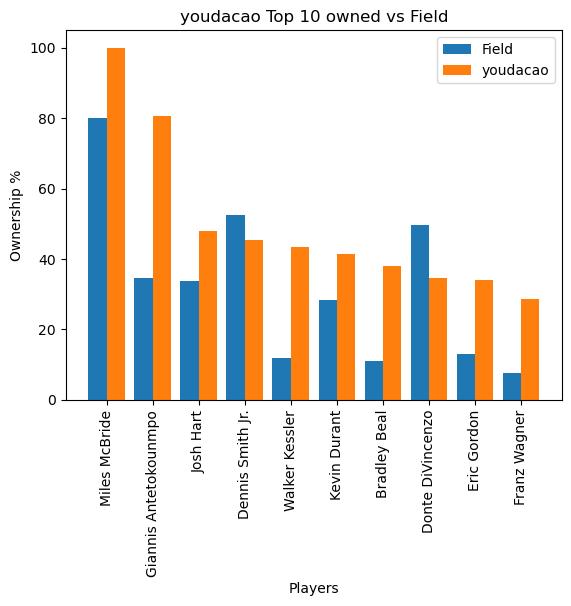

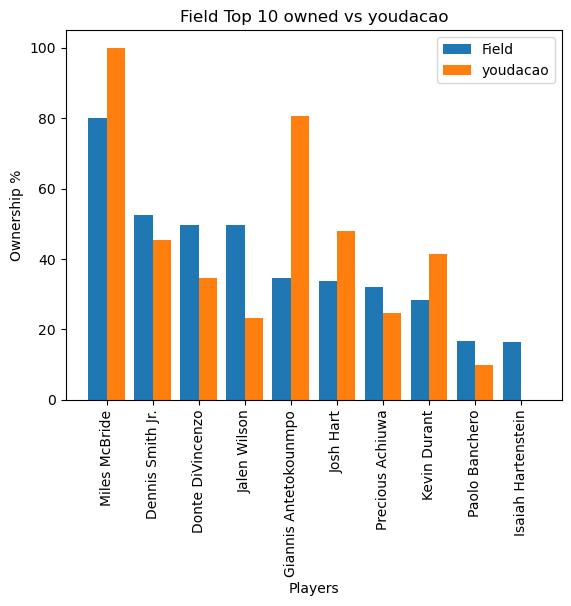

In [177]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
#get a usernames player exposures and players net winnings

username = 'youdacao'
contest_fpath = "C:\\Users\\brose32\\Documents\\flagship0208.csv"
contest_df = pd.read_csv(contest_fpath, usecols=['Rank', 'EntryId', 'EntryName', 'Points', 'Lineup'])
ownership_df = pd.read_csv(contest_fpath, usecols=['Player', 'Roster Position', '%Drafted', 'FPTS'])

contest_details = requests.get("https://api.draftkings.com/contests/v1/contests/158553858?format=json")
contest_dict = other_contest_details.json()['contestDetail']
contest_payouts = other_contest_details.json()['contestDetail']['payoutSummary']

lineups_df = contest_df[contest_df['EntryName'].str.contains(username)]
if len(lineups_df) > contest_dict['maximumEntriesPerUser']:
    print(f'ERROR - more than {contest_dict["maximumEntriesPerUser"]} lineups found')

player_exposures = {}


#get players net winnings
winnings = 0
for rank in lineups_df['Rank']:
    for d in other_contest_payouts:
        if rank >= d['minPosition'] and rank <= d['maxPosition']:
            winnings += d['payoutDescriptions'][0]['value']

print(f"{username} Net Winnings: {winnings - - (len(lineups_df) * contest_dict['entryFee'])}")
            
for lineup in lineups_df['Lineup']:
    pattern = r'(?<=C\s).*?(?=\sF\s)'
    center = re.search(pattern, lineup).group(0)
    player_exposures[center] = player_exposures.get(center, 0) + 1
    pattern = r'(?<=F\s).*?(?=\sG\s)'
    forward = re.search(pattern, lineup).group(0)
    player_exposures[forward] = player_exposures.get(forward, 0) + 1
    pattern = r'(?<=G\s).*?(?=\sPF\s)'
    guard = re.search(pattern, lineup).group(0)
    player_exposures[guard] = player_exposures.get(guard, 0) + 1
    pattern = r'(?<=PF\s).*?(?=\sPG\s)'
    powerforward = re.search(pattern, lineup).group(0)
    player_exposures[powerforward] = player_exposures.get(powerforward, 0) + 1
    pattern = r'(?<=PG\s).*?(?=\sSF\s)'
    pointguard = re.search(pattern, lineup).group(0)
    player_exposures[pointguard] = player_exposures.get(pointguard, 0) + 1
    pattern = r'(?<=SF\s).*?(?=\sSG\s)'
    smallforward = re.search(pattern, lineup).group(0)
    player_exposures[smallforward] = player_exposures.get(smallforward, 0) + 1
    pattern = r'(?<=SG\s).*?(?=\sUTIL\s)'
    shootingguard = re.search(pattern, lineup).group(0)
    player_exposures[shootingguard] = player_exposures.get(shootingguard, 0) + 1
    pattern = r'(?<=UTIL\s).*$'
    util = re.search(pattern, lineup).group(0)
    player_exposures[util] = player_exposures.get(util, 0) + 1

print(f'Player Pool: {len(player_exposures)}')
sorted_players = sorted(player_exposures.items(), key=lambda x: x[1], reverse=True)
for player in sorted_players:
    print(player[0], (player[1] / len(lineups_df) * 100))

#Players Top 10 owned players
player_top10 = dict(sorted_players[:10])
x = list(player_top10.keys())
x_axis = np.arange(len(x))

player_own = list([(player_top10[o] / len(lineups_df) * 100) for o in player_top10])
contest_own10_df = ownership_df[ownership_df['Player'].isin(x)]
contest_own = [float(contest_own10_df[contest_own10_df['Player'] == player]['%Drafted'].values[0].replace('%', '')) for player in x]

plt.bar(x_axis - 0.2, contest_own, 0.4, label = 'Field')
plt.bar(x_axis + 0.2, player_own, 0.4, label = username)
plt.xticks(x_axis, x, rotation='vertical')
plt.xlabel('Players')
plt.ylabel('Ownership %')
plt.title(f"{username} Top 10 owned vs Field")
plt.legend()
plt.show()

# plt.bar(list(player_top10.keys()), list([player / len(lineups_df) * 100 for player in player_top10.values()]))

# plt.title(f'{username} Top 10 Owned Players')
# plt.xlabel("Players")
# plt.ylabel("Ownership %")
# plt.xticks(rotation='vertical')
# plt.show()


#Top 10 owned contest players and username exposures
owned_top10 = ownership_df.head(10)
x = list(owned_top10['Player'].values)
x_axis = np.arange(len(x))

contest_own = list([float(o.replace('%','')) for o in owned_top10['%Drafted']])
player_own = list([player_exposures[player] / len(lineups_df) * 100 if player in player_exposures else 0 for player in x])

plt.bar(x_axis - 0.2, contest_own, 0.4, label = 'Field')
plt.bar(x_axis + 0.2, player_own, 0.4, label = username)
plt.xticks(x_axis, x, rotation='vertical')
plt.xlabel('Players')
plt.ylabel('Ownership %')
plt.title(f"Field Top 10 owned vs {username}")
plt.legend()
plt.show()


In [102]:
import re

text = "C Anderson Freddy F Josh Hart G Luka Doncic PF Paolo Banchero PG Dennis Smith Jr. SF Jalen Wilson SG Miles McBride UTIL Coby White"
pattern = r'(?<=C\s).*?(?=\sF\s)'
center = re.search(pattern, text).group(0)
print(center)


Anderson Freddy
